# Airline Analysis

I want to make sure that I can find the best deal for my client and help them to understand how airline prices change based on different factors.

The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, I'll explore the dataset and get to know each of these features.


## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

               miles     passengers          delay    coach_price  \
count  129780.000000  129780.000000  129780.000000  129780.000000   
mean     2006.224696     207.723155      13.162845     376.585253   
std       943.034768      12.776363      41.941680      67.744274   
min        12.000000     135.000000       0.000000      44.415000   
25%      1343.000000     204.000000       9.000000     331.445000   
50%      1986.000000     210.000000      10.000000     380.560000   
75%      2468.000000     215.000000      13.000000     426.676250   
max      4548.000000     244.000000    1560.000000     593.635000   

       firstclass_price          hours  
count     129780.000000  129780.000000  
mean        1454.931785       3.631214  
std          162.590434       1.739118  
min          939.100000       1.000000  
25%         1302.200000       2.000000  
50%         1503.840000       4.000000  
75%         1582.370000       4.000000  
max         1846.780000       8.000000  


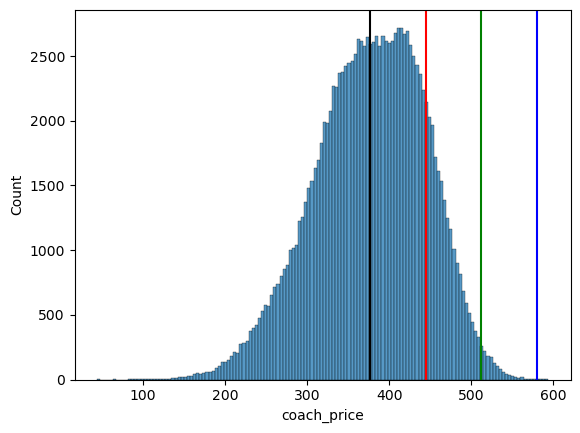

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
from scipy.stats import mode
import math

## Read in Data
flight = pd.read_csv("flight.csv")
flight.head()

## Task 1b
print(flight.describe())
third_sd = flight['coach_price'].mean() + (67.744274 *3)

# flight['coach_price'].plot(kind='hist', bins=20)
ax = sns.histplot(data=flight, x='coach_price')
ax.axvline(flight['coach_price'].mean(), color='black', linestyle='-', label='mean')
ax.axvline(flight['coach_price'].mean() + (67.744274), \
           color='red', linestyle='-', label='1st std Dev')
ax.axvline(flight['coach_price'].mean() + (67.744274 *2), \
           color='green', linestyle='-', label='2nd std Dev')

ax.axvline(third_sd, color='blue', linestyle='-', label='3rd std Dev')

plt.show()

In [2]:
print(np.percentile(flight['coach_price'], [2.5, 97.5]))

[234.55975  494.452625]


2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

431.834377372817


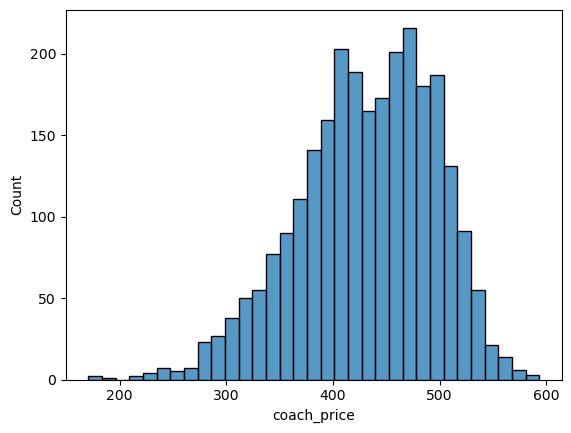

<Figure size 640x480 with 0 Axes>

In [3]:
## Task 2
flight_8_hour = flight.query('hours >= 8')
print(flight_8_hour['coach_price'].mean())
sns.histplot(flight_8_hour['coach_price'])
plt.show()
plt.clf()

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

In [4]:
flight['delay'].median()

10.0

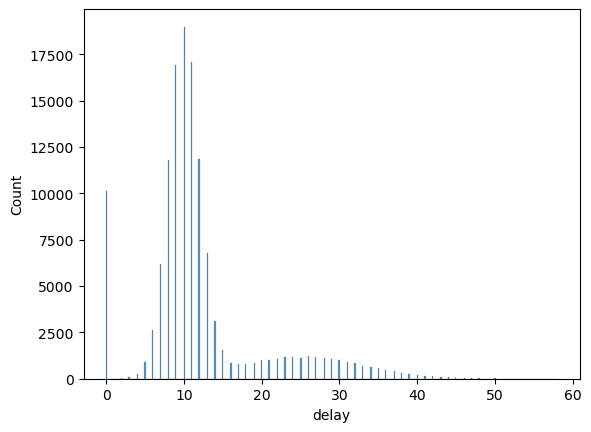

<Figure size 640x480 with 0 Axes>

In [5]:
## Task 3
sub_delay = flight.query('delay <= 500')
sns.histplot(sub_delay.delay)
# plt.axis([30, 40, 0, 1000])
plt.show()
plt.clf()


## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

In [6]:
perc = 0.05
flight_sub = flight.sample(n = int(flight.shape[0] * perc))


C:\Users\omoke\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


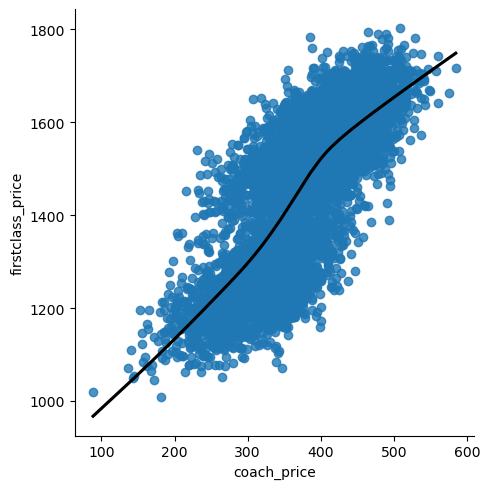

<Figure size 640x480 with 0 Axes>

In [7]:
## Task 4

# sns.scatterplot(data=flight_sub, x="coach_price", y="firstclass_price", alpha = 0.2)
sns.lmplot(data = flight_sub, x="coach_price", y="firstclass_price", line_kws={'color': 'black'}, lowess=True)

plt.show()
plt.clf()

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

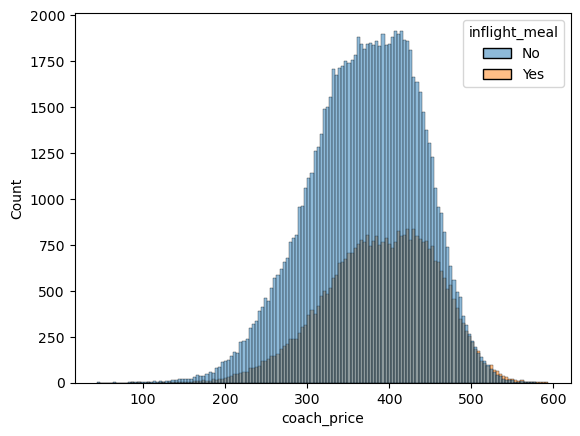

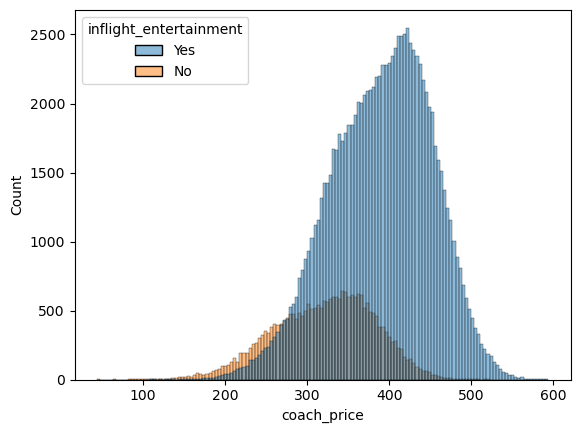

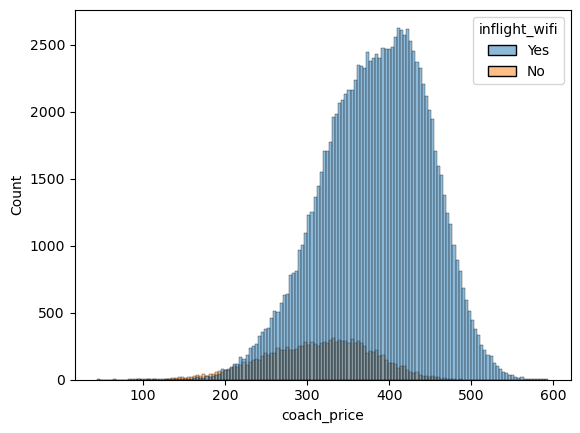

<Figure size 640x480 with 0 Axes>

In [26]:
## Task 5
relationship_price = flight[['inflight_meal',
       'inflight_entertainment', 'inflight_wifi',
        'coach_price', ]]


# sns.boxplot(data = flight, x = 'inflight_meal', y = 'coach_price')
# plt.show()
# plt.clf()

# inflight meal
sns.histplot(data = flight, x = 'coach_price', hue='inflight_meal')
plt.show()
plt.clf()

#inflight entertainment
sns.histplot(data = flight, x = 'coach_price', hue='inflight_entertainment')
plt.show()
plt.clf()


# sns.boxplot(data=flight, x='inflight_entertainment', y='coach_price')
# plt.show()
# plt.clf()
#inflight wifi
sns.histplot(data = flight, x = 'coach_price', hue='inflight_wifi')
plt.show()
plt.clf()


6. How does the number of passengers change in relation to the length of flights?

In [37]:
flight_sub.head()


,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
22894,2430,208,13,No,Yes,Yes,Friday,No,Yes,385.780,1528.79,4
118934,3143,219,26,Yes,Yes,Yes,Sunday,No,Yes,499.545,1674.33,6
96421,2154,207,11,Yes,Yes,Yes,Sunday,No,Yes,455.260,1628.78,4
78148,945,214,11,Yes,Yes,Yes,Saturday,No,Yes,456.525,1555.24,2
16345,2146,225,13,No,Yes,No,Saturday,No,Yes,361.100,1497.10,4


C:\Users\omoke\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


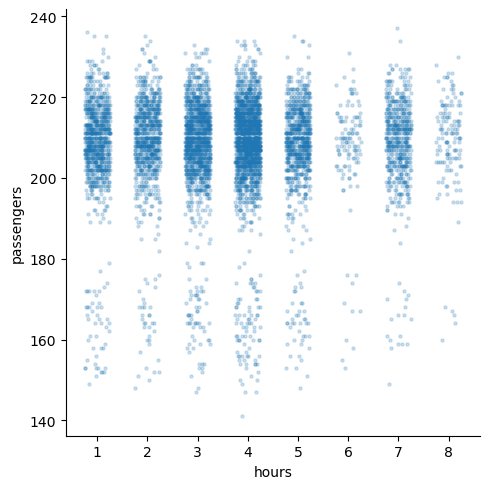

In [46]:
## Task 6

sns.lmplot(data = flight_sub, x = 'hours', y='passengers', x_jitter = 0.25, scatter_kws={'s':5, 'alpha': 0.2}, fit_reg=False)

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

C:\Users\omoke\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


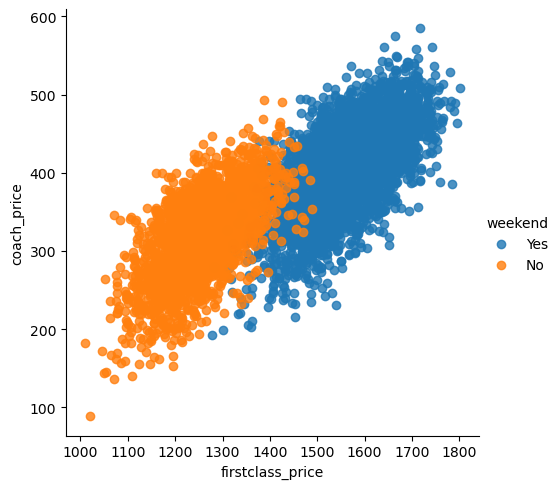

<Figure size 640x480 with 0 Axes>

In [53]:
## Task 7

sns.lmplot(data=flight_sub, x='firstclass_price', y='coach_price', hue= 'weekend', fit_reg=False)
plt.show()
plt.clf()

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

<Axes: xlabel='day_of_week', ylabel='coach_price'>

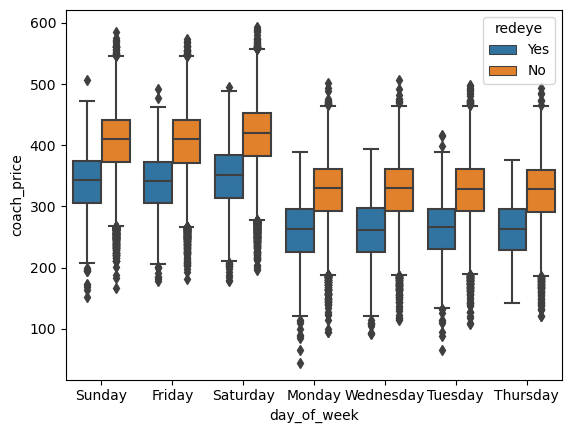

In [66]:
## Task 8
sns.boxplot(flight, y='coach_price', x='day_of_week', hue = 'redeye')

In [62]:
flight.columns

Index(['miles', 'passengers', 'delay', 'inflight_meal',
       'inflight_entertainment', 'inflight_wifi', 'day_of_week', 'redeye',
       'weekend', 'coach_price', 'firstclass_price', 'hours'],
      dtype='object')